# Linear regression project

<u>outline</u>

<ul>
    <li>import libraries/ table</li>
    <li>Exploratory data analysis (EDA)</li>
    <ul>
        <li>Description of the data</li>
    </ul>
    <li>training and testing</li>
    <ul>
        <li><span style ="color:red">special note</span>: understanding & <b>predicting</b> values w/ example calculation</li>
    </ul>
    <li>evaluate model</li>
    <li>Determine residuals</li>  
</ul>

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
customers=pd.read_csv('Ecommerce Customers-Copy1')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# EDA

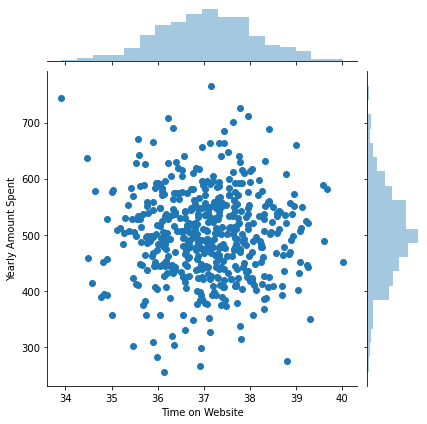

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

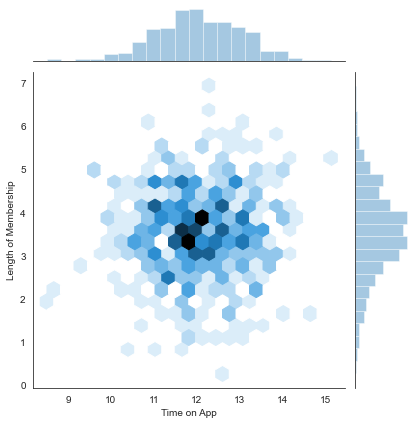

In [7]:
sns.set_style('white')
sns.jointplot(x="Time on App",y="Length of Membership",
             data=customers,kind='hex')

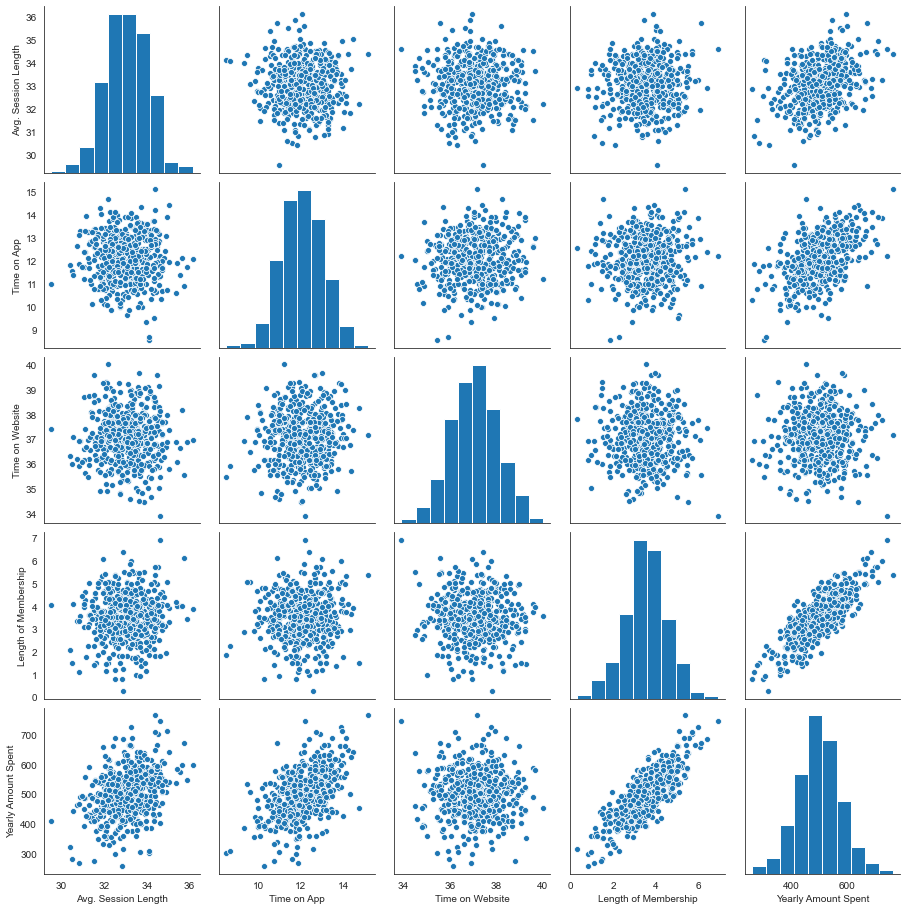

In [8]:
sns.pairplot(customers)

## Description of the data

"Length of membership" is most strongly corrolated with "yearly amount spent". The average length of membership is 3-4 years. 

Additionally, there is weaker positive correlation between "time_on_App" and "Yearly amount spent" and an even weaker positive corrolation between "Avg. Session Length" and "Yearly Amount Spent". The average "time_on_App" is is 13 min and average "Avg. Session Length" is 34 min. 

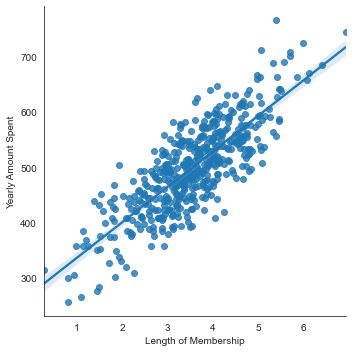

In [9]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=customers)

# training and testing

In [10]:
y=customers["Yearly Amount Spent"]
X=customers[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm=LinearRegression()

### 3/12/24

In [15]:
#cont from here- ref. w/ "linear regression" notebook
#problem here- X data needs to be
                #arranged vertically by .reshape(-1,1)
                #NOT horozontally
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
#.predict method--> predicts values
    #for what predict value does- ref. below
#slice predictions to get value @ index "x"
predictions=lm.predict(X_test)

<span style='font-size:24px'><span style ="color:red">special note</span>: understanding & <b>predicting</b> values w/ example calculation</span>

<ul>
    <li>if <b>predicting data</b></li>
    <ul>
        <li>remember <b>y_test</b> = generated FROM ORIGINAL data set</li>
        <ul>
            <li>(it's NOT calulated)</li>
        </ul>
        <li><span style='color:red'>Think about more</span>!- how are multiple values from <b>X_test</b> ("Avg. Session Length", "Time on App",etc)</li>
        <ul>
            <li>used to generate  <b>predictions</b> values?</li>
            <ul>
                <li>(for <b>y_test</b> <span style='color:blue'>ref. prev. bullet above</span>)</li>
                <li><span style='color:red'>mnemonic: group and visualize</span> <span style='color:blue'>ref. table in next cell</span></li>
                <li><span style='color:red'>answer</span>: <span style= 'background-color:yellow'>formula: y(predictions)=β0+β1x1+β2x2+...βpxp</span></li>
                <ul>
                    <li>β0= intercept</li>
                    <li>βa= coefficint a</li>
                </ul>
                <span style="color:blue">
                <li>ref.</li>
                <ol>
                    <li>intro to statistical learning section 3.2.1</li>
                    <li>"example prediction" calculation cell below</li>
                </ol>
                </span>
            </ul>
        </ul>
    </ul>

[placeholder bullet]
<ul>
    <li></li>
</ul>

In [17]:
#mnemonic: group & visualize

df=pd.DataFrame(X_test)
df['predictions']= predictions
df['y_test']=y_test
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,predictions,y_test
18,32.187812,14.715388,38.244115,1.516576,456.441861,452.315675
361,32.077590,10.347877,39.045156,3.434560,402.720053,401.033135
104,31.389585,10.994224,38.074452,3.428860,409.253154,410.069611
4,33.330673,12.795189,37.536653,4.446308,591.431034,599.406092
156,32.294642,12.443048,37.327848,5.084861,590.014373,586.155870


In [18]:
df.loc[[414]]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,predictions,y_test
414,32.381035,12.433129,37.626907,4.334001,545.921136,532.724805


In [19]:
print('Coefficients:\n',lm.coef_)
print('\n')
print('intercept =',lm.intercept_)

B=[]
B.append(round(lm.intercept_,2))
B.extend(np.around(lm.coef_,2))

print("equation is: y=~ {} + {}*x1 + {}*x2 + {}*x3 + {}*x4".format(B[0],B[1],B[2],B[3],B[4]))

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


intercept = -1047.9327822502387
equation is: y=~ -1047.93 + 25.98*x1 + 38.59*x2 + 0.19*x3 + 61.28*x4


In [20]:
X_test.index[:10]

Int64Index([18, 361, 104, 4, 156, 350, 32, 205, 81, 414], dtype='int64')

In [21]:
#example prediction calculation

pred_i=414

ex_calc=np.array([lm.intercept_,
lm.coef_[0]*X_test['Avg. Session Length'][pred_i],
lm.coef_[1]*X_test['Time on App'][pred_i],
lm.coef_[2]*X_test['Time on Website'][pred_i],
lm.coef_[3]*X_test['Length of Membership'][pred_i]])

ex_calc.sum()

545.9211363981177

**Back to normal exercise**

Text(0, 0.5, 'predictions')

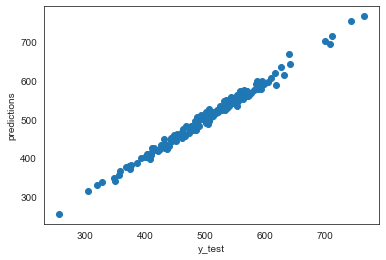

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

**evaluate model**

In [24]:
from sklearn import metrics

In [25]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print("RMS: ",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.228148653430853
MSE:  79.81305165097487
RMS:  8.933815066978656


<b>Determine residuals</b>

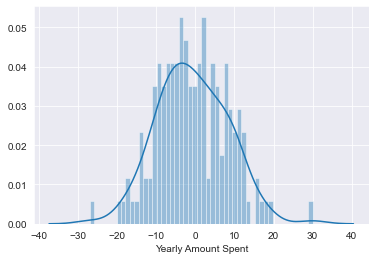

In [26]:
sns.set_style('darkgrid')
sns.distplot(y_test-predictions,bins=50)